# Plotting

First, let's train up a simple network to explore. This one is trained to compute XOR:

In [1]:
from conx import Network, Layer, SGD

#net = Network("XOR Network", 2, 4, 1, activation="sigmoid")

net = Network("XOR 2-4-1 Network")
net.add(Layer("input", shape=2))
net.add(Layer("hidden", shape=4, activation='sigmoid'))
net.add(Layer("output", shape=1, activation='sigmoid'))
net.connect()

dataset = [
    ([0, 0], [0], "1"),
    ([0, 1], [1], "2"),
    ([1, 0], [1], "3"),
    ([1, 1], [0], "4")
]
net.compile(loss='mean_squared_error', optimizer=SGD(lr=0.3, momentum=0.9))
net.dataset.load(dataset)

Using Theano backend.
conx, version 3.5.0


In [2]:
net.get_weights_as_image("hidden", None).size

(4, 2)

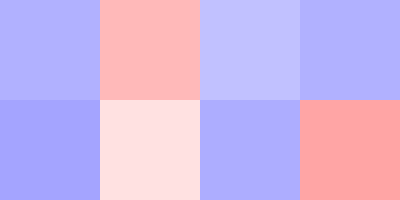

In [3]:
net.get_weights_as_image("hidden", None).resize((400, 200))

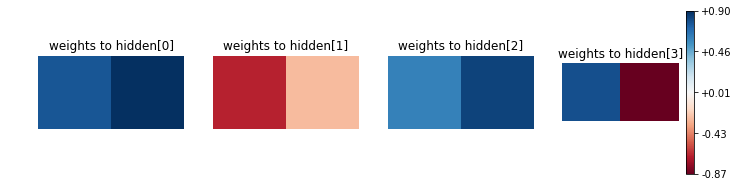

In [4]:
net.plot_layer_weights('hidden', colormap="RdBu")

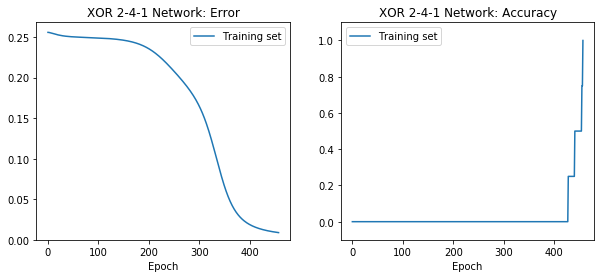

In [5]:
if net.saved():
    net.load()
    net.plot_results()
else:
    net.reset(seed=3863479522)
    net.train(epochs=2000, accuracy=1, report_rate=25, plot=True, record=True)
    net.save()

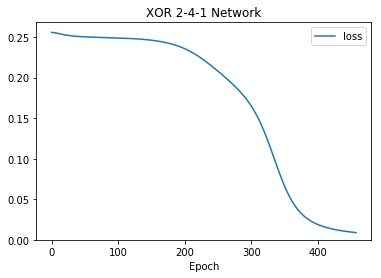

In [6]:
net.plot('loss', ymin=0)

## plot_activation_map

This plotting function allows us to see the activation of a specific unit in a specific layer, as a function of the activations of two other units from an earlier layer. In this example, we show the behavior of the single output unit as the two input units are varied across the range 0.0 to 1.0:

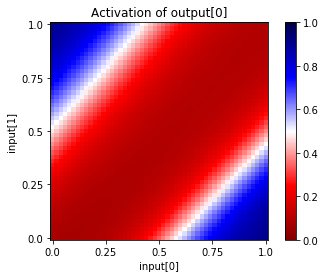

In [7]:
net.plot_activation_map('input', (0,1), 'output', 0)

We can verify the above output activation map by running different input vectors through the network manually:

In [8]:
input=[1,1];net.propagate(input)[0]

0.09831498563289642

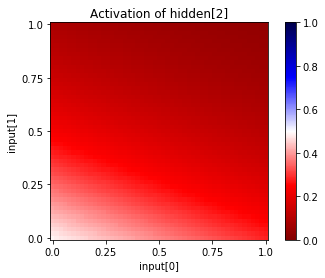

----------------------------------------------------------------------------------------------------
Activation of hidden[2] as a function of input[0] and input[1]
rows: input[1] decreasing from 1.00 to 0.00
cols: input[0] increasing from 0.00 to 1.00

0.09 0.09 0.08 0.08 0.08 0.07 0.07 0.07 0.06 0.06 0.06 0.06 0.05 0.05 0.05 0.05 0.05 0.04 0.04 0.04 
0.10 0.10 0.09 0.09 0.09 0.08 0.08 0.08 0.07 0.07 0.07 0.06 0.06 0.06 0.06 0.05 0.05 0.05 0.05 0.04 
0.11 0.11 0.10 0.10 0.10 0.09 0.09 0.08 0.08 0.08 0.07 0.07 0.07 0.07 0.06 0.06 0.06 0.05 0.05 0.05 
0.12 0.12 0.12 0.11 0.11 0.10 0.10 0.09 0.09 0.09 0.08 0.08 0.08 0.07 0.07 0.07 0.06 0.06 0.06 0.06 
0.14 0.13 0.13 0.12 0.12 0.11 0.11 0.10 0.10 0.10 0.09 0.09 0.08 0.08 0.08 0.07 0.07 0.07 0.07 0.06 
0.15 0.15 0.14 0.14 0.13 0.13 0.12 0.12 0.11 0.11 0.10 0.10 0.09 0.09 0.09 0.08 0.08 0.08 0.07 0.07 
0.17 0.16 0.16 0.15 0.14 0.14 0.13 0.13 0.12 0.12 0.11 0.11 0.10 0.10 0.10 0.09 0.09 0.09 0.08 0.08 
0.19 0.18 0.17 0.17 0.16 0.15 0.15 0.14 

In [9]:
# map of hidden[2] activation as a function of inputs
net.plot_activation_map('input', (0,1), 'hidden', 2, show_values=True)

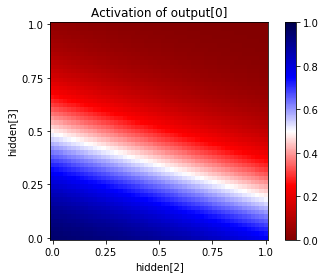

In [10]:
# map of output activation as a function of hidden units 2,3
net.plot_activation_map('hidden', (2,3), 'output', 0)

How does the network actually solve the problem? We can look at the intermediary values at the hidden layer by plotting each of the 4 hidden units in this manner:

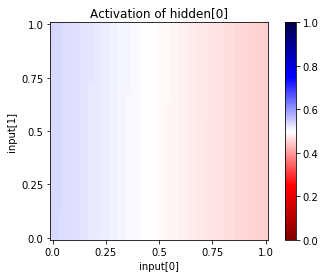

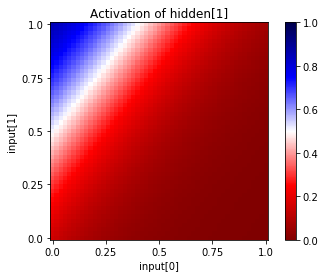

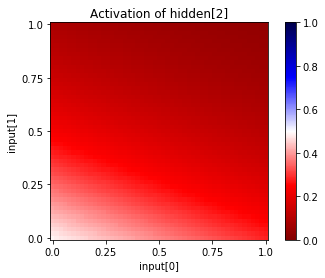

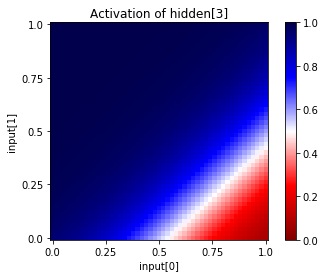

In [11]:
for i in range(4):
    net.plot_activation_map('input', (0,1), 'hidden', i)

SequenceViewer(children=(VBox(children=(HBox(children=(IntSlider(value=0, continuous_update=False, description='XOR 2-4-1 Network Playback:', layout=Layout(width='100%'), max=457, style=SliderStyle(description_width='initial')), Label(value='of 458', layout=Layout(width='100px'))), layout=Layout(height='40px')), HBox(children=(Button(icon='fast-backward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='backward', layout=Layout(width='100%'), style=ButtonStyle()), IntText(value=0, layout=Layout(width='100%')), Button(icon='forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='fast-forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(description='Play', icon='play', layout=Layout(width='100%'), style=ButtonStyle())), layout=Layout(height='50px', width='100%'))), layout=Layout(width='100%')), Output()))

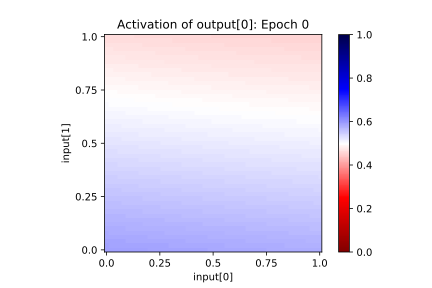

In [12]:
net.playback(lambda net, epoch: 
             net.plot_activation_map(title="Epoch %s" % epoch, interactive=False))

## Adding Additional Hidden Layers

In [13]:
from conx import Network, Layer, SGD

net = Network("XOR 2-4-2-1 Network")
net.add(Layer("input", shape=2))
net.add(Layer("hidden", shape=4, activation='sigmoid'))
net.add(Layer("hidden2", shape=2, activation='sigmoid'))
net.add(Layer("output", shape=1, activation='sigmoid'))
net.connect()

dataset = [
    ([0, 0], [0], "1"),
    ([0, 1], [1], "2"),
    ([1, 0], [1], "3"),
    ([1, 1], [0], "4")
]
net.compile(loss='mean_squared_error', optimizer=SGD(lr=0.3, momentum=0.9))
net.dataset.load(dataset)

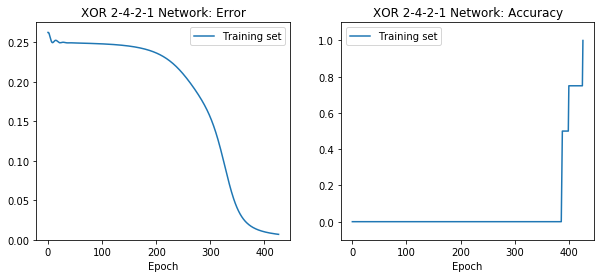

In [14]:
if net.saved():
    net.load()
    net.plot_results()
else:
    net.reset(seed=3863479522)
    net.train(epochs=2000, accuracy=1, report_rate=25, plot=True)
    net.save()

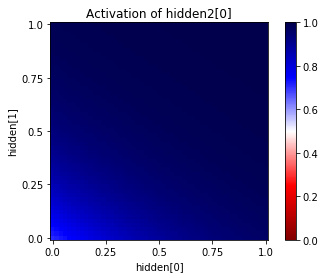

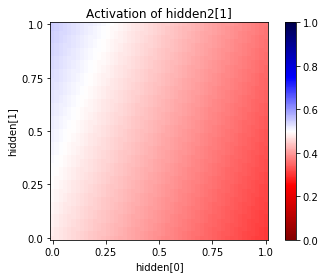

In [15]:
for i in range(2):
    net.plot_activation_map('hidden', (0,1), 'hidden2', i)

## Plotting training error (loss) and training accuracy (acc)

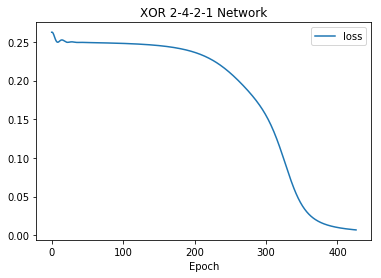

In [16]:
net.plot("loss")

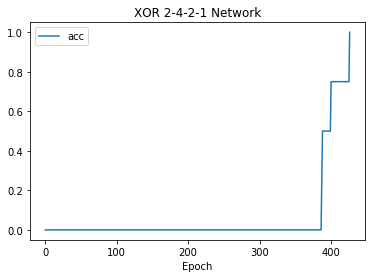

In [17]:
net.plot("acc")

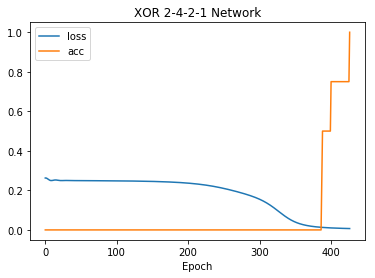

In [18]:
net.plot(["loss", "acc"])

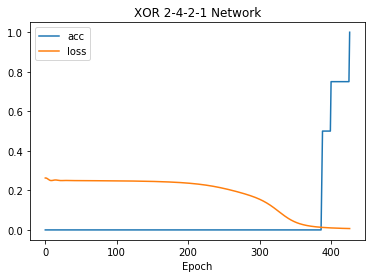

In [19]:
net.plot("all")

## Plotting Your Own Data

In [20]:
from conx import plot, scatter, get_symbol

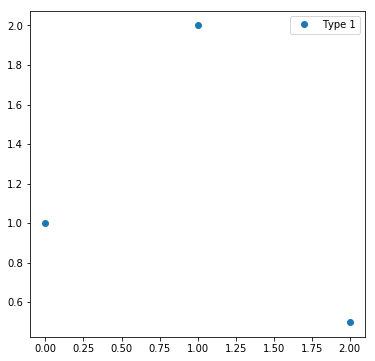

In [21]:
data = ["Type 1", [(0, 1), (1, 2), (2, .5)]]
scatter(data)

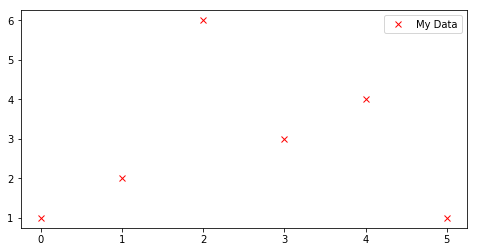

In [22]:
data = ["My Data", [1, 2, 6, 3, 4, 1]]
symbols = {"My Data": "rx"}
plot(data, symbols=symbols)

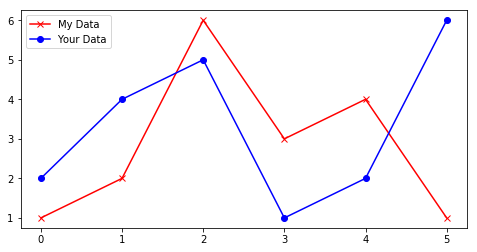

In [24]:
data = [["My Data", [1, 2, 6, 3, 4, 1]],
        ["Your Data", [2, 4, 5, 1, 2, 6]]]
symbols = {"My Data": "rx-", "Your Data": "bo-"}
plot(data, symbols=symbols)